In [ ]:
#|default_exp data

In [ ]:
#|hide
import nbdev; nbdev.nbdev_export() # C-s and C-RET to save and export

In [ ]:
#|hide
%load_ext autoreload
%autoreload 2

# Data

Data generation, preprocessing, and loading.

In [ ]:
#|export
from fastai.vision.all import *
import andi_datasets

In [ ]:
#|hide
from SPIVAE.utils import *

# Data generation

In [ ]:
alphas_all = np.linspace(0.04,1.96,49); alphas_all

array([0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 , 0.44,
       0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84, 0.88,
       0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28, 1.32,
       1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72, 1.76,
       1.8 , 1.84, 1.88, 1.92, 1.96])

In [ ]:
#|export
from andi_datasets.datasets_theory import datasets_theory
AD = datasets_theory()

In [ ]:
AD.avail_models_name

['attm', 'ctrw', 'fbm', 'lw', 'sbm']

In [ ]:
dataset = AD.create_dataset(T=400, N_models=6000,  # 50_000,
                            exponents=alphas_all,
                            models=[2],  # fbm
                            N_save=6000,  # 50_000,
                            t_save=400,
                            save_trajectories=True,
                            load_trajectories=False,
                            path="../../data/raw/")

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

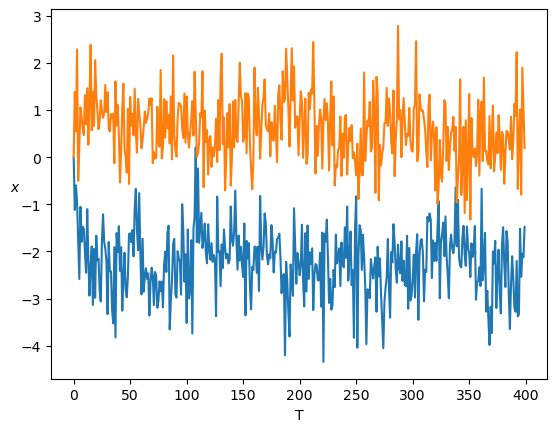

In [ ]:
plt.plot(dataset[:2,2:].T); plt.xlabel('T');plt.ylabel(r'$x$', rotation=0);

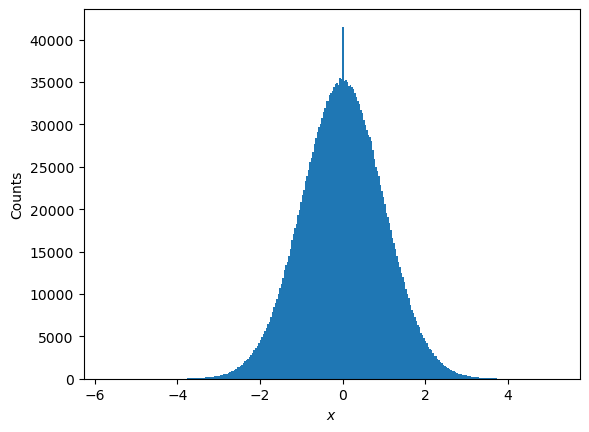

In [ ]:
plt.hist(dataset[:6000,2:].reshape(-1), 300);
plt.xlabel(r'$x$',);plt.ylabel('Counts');

In [ ]:
#  For the generation of SBM we take directly the function from
#  https://github.com/AnDiChallenge/andi_datasets/blob/develop/source_nbs/lib_nbs/models_theory.ipynb
# to control sigma as D_0
from scipy.special import erfcinv
def sbm(T, alpha, sigma = 1):
    '''Creates a scaled brownian motion trajectory'''
    msd = (sigma**2)*np.arange(T+1)**alpha
    dx = np.sqrt(msd[1:]-msd[:-1])
    dx = np.sqrt(2)*dx*erfcinv(2-2*np.random.rand(len(dx)))
    return dx
    # return np.cumsum(dx)-dx[0]

In [ ]:
T=400
N=6_000
Ds = np.geomspace(1e-5,1e-2, 10); Ds

array([1.00000000e-05, 2.15443469e-05, 4.64158883e-05, 1.00000000e-04,
       2.15443469e-04, 4.64158883e-04, 1.00000000e-03, 2.15443469e-03,
       4.64158883e-03, 1.00000000e-02])

In [ ]:
disp_gen = {f'{a:.3g}'+f',{D:.3g}':[] for D in Ds for a in alphas_all}

In [ ]:
alphas_all[4:-5:10], Ds[6::3]

(array([0.2, 0.6, 1. , 1.4]), array([0.001, 0.01 ]))

In [ ]:
for i,a in enumerate(alphas_all[4:-5:10]):
    for j,D in enumerate(Ds[6::3]):
        k = f'{a:.3g}'+f',{D:.3g}'
        disp_gen[k]=np.array([np.concatenate(([a,D],sbm(T, a, sigma = D2sig(D)))) for n in range(N)]) # N, T+2

In [ ]:
# np.savez_compressed('../../data/raw/sbm.npz',**disp_gen)

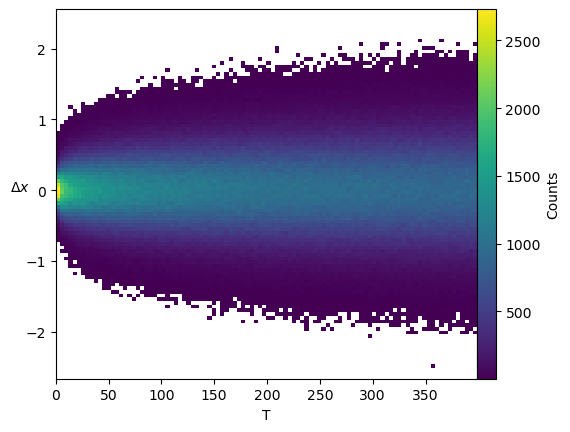

In [ ]:
h=plt.hist2d(np.tile(np.arange(T),N),disp_gen['1.4,0.01'][:,2:].reshape(-1),100, cmin=2);
plt.xlabel('T');plt.ylabel(r'$\Delta x$', rotation=0);
cb=plt.colorbar(pad=0, label='Counts')

# Data Loader

In [ ]:
#|export
from andi_datasets.utils_trajectories import normalize_fGN

In [ ]:
#|export
def load_data(ds_args):
    if ds_args['model']=='fbm':
        ds = AD.create_dataset(T=ds_args["T"], N_models=ds_args["N"],
                               exponents=ds_args["alpha"], models=[2], 
                               N_save=6_000,#50_000,
                               t_save=400,
                               save_trajectories=False, load_trajectories=True,
                               path=ds_args["path"])  # trajs, T+2
        ds_labels = ds[:,1][:,None]  # trajs=N*n_alphas,1 # alpha
        n_labels = 1
        ds = ds[:,2:]  # trajs=N*n_alphas, T
        # convert trajectories to displacements:
        ds = np.subtract(ds[:,1:], ds[:,:-1])  # trajs=N*n_alphas, T-1
        # Normalize to the given D
        # take all alphas and assign one D each time
        ds = np.array([normalize_fGN(ds,ds_labels,D,399)
                       for D in ds_args['D']
                      ]).reshape(-1,ds_args["T"]-1)
        ds_labels =np.concatenate((np.tile(ds_labels, (len(ds_args['D']),1)),
                                   np.array(ds_args['D'])[:,None].repeat(len(ds_labels),axis=0)
                                  ),axis=-1)
    elif ds_args['model']=='sbm':
        ds_labels = np.empty((ds_args["N"]*len(ds_args["alpha"])*len(ds_args["D"]),2))
        ds        = np.empty((ds_args["N"]*len(ds_args["alpha"])*len(ds_args["D"]),ds_args["T"]-1))
        n = 0
        f = np.load('../../data/raw/sbm.npz')
        for i,a in enumerate(ds_args["alpha"]):
            for j,D in enumerate(ds_args["D"]):
                k = f'{a:.3g}'+f',{D:.3g}'
                ds_labels[n:n+ds_args["N"]] = f[k][:ds_args["N"],:2]
                ds[n:n+ds_args["N"]] = f[k][:ds_args["N"],2:2+ds_args["T"]-1]
                n =  n+ds_args["N"]
    # trajs=N*n_alphas, 2
    n_labels=2
    # ensure data type
    ds = ds.astype(np.float32);  ds_labels = ds_labels.astype(np.float32)
    ds = np.concatenate((ds_labels,ds),axis=-1)
    tfm = ConditionalsTransform(n_labels=n_labels)

    n_inp = 1
    splits_idx = RandomSplitter(valid_pct=ds_args['valid_pct'], seed=ds_args['seed'])(np.arange(len(ds)))
    tfl = TfmdLists(ds, tfm, splits=splits_idx,)  # iter
    return tfl.dataloaders(ds_args['bs'], n_inp=n_inp, num_workers=2, pin_memory=True, drop_last=True)

class ConditionalsTransform(Transform):
    def __init__(self, n_labels=1): store_attr()
    def encodes(self, andi_dataset_item):
        ds,ds_labels = andi_dataset_item[self.n_labels:], andi_dataset_item[:self.n_labels]
        # for convolutions insert a channel dimension.
        ds_ = np.expand_dims(ds, axis=-1)
        channel_dim = 0
        ds = np.expand_dims(ds, axis=channel_dim)
        return (ds, ds_)

In [ ]:
Ds     = [1e-4, 1e-3, 1e-2]
alphas = [0.6, 1.0, 1.4]
n_alphas, n_Ds = len(alphas), len(Ds)
ds_args = dict(path="../../data/raw/", model='fbm', # 'sbm'
               N=int(6_000/n_alphas/n_Ds),
               T=400,
               D=Ds, alpha=alphas,
               trajectories=False,
               with_label=True,seed=0,
               valid_pct=0.2,
               bs=2**8,
              )
dls = load_data(ds_args)

In [ ]:
dls.bs, dls.device, len(dls.one_batch())

(256, device(type='cpu'), 2)

In [ ]:
print(L(map(lambda x: x.shape, dls.one_batch())))
#print(dls.one_batch())

[torch.Size([256, 1, 399]), torch.Size([256, 399, 1])]


In [ ]:
alphas_items = dls.valid.items[:,0]
Ds_items     = dls.valid.items[:,1]
u_a=np.unique(alphas_items, return_index=True, return_inverse=True)
u_D=np.unique(Ds_items, return_index=True, return_inverse=True)
alphas_idx = [np.flatnonzero(alphas_items==a) for a in u_a[0]]
Ds_idx = [np.flatnonzero(Ds_items==D) for D in u_D[0]]

In [ ]:
from tqdm.auto import tqdm

In [ ]:
ds_in = []
with torch.no_grad():
    for b in tqdm(dls.valid):
        if True: x,y=b; # model_args['c_channels']>0
        else: x,a,_,y=b;
        ds_in.append(to_detach(x).numpy())

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
ds_in = np.concatenate(ds_in)#.shape

In [ ]:
ds_in.shape

(1198, 1, 399)

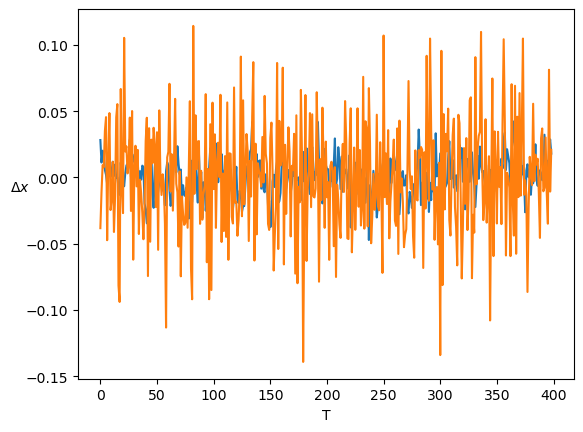

In [ ]:
plt.plot(ds_in.squeeze()[:2].T); plt.xlabel('T');plt.ylabel(r'$\Delta x$', rotation=0);

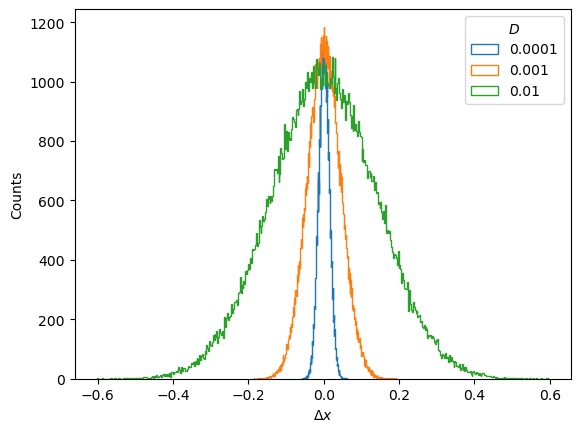

In [ ]:
for i,D in enumerate(u_D[0]): plt.hist(ds_in[Ds_idx[i]].reshape(-1),500, histtype='step', label=f'{D:.2g}');
plt.ylabel('Counts');plt.xlabel(r'$\Delta x$');
plt.legend(title=r'$D$');